## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['writing_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [8]:
y = df['writing_score']

In [9]:
y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing_score, Length: 1000, dtype: int64

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [ ]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99
996,male,group C,high school,free/reduced,none,62,55
997,female,group C,high school,free/reduced,completed,59,71
998,female,group D,some college,standard,completed,68,78


In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.39002351,  0.19399858],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.19207553,  1.42747598],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.57771141,  1.77010859],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.46775108,  0.12547206],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12609287,  0.60515772],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.71993682,  1.15336989]])

In [23]:
X.shape

(1000, 19)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((750, 19), (250, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3576
- Mean Absolute Error: 2.6848
- R2 Score: 0.9488
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8159
- Mean Absolute Error: 3.1753
- R2 Score: 0.9435


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.5143
- Mean Absolute Error: 3.6549
- R2 Score: 0.9075
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9200
- Mean Absolute Error: 3.9019
- R2 Score: 0.9060


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.3576
- Mean Absolute Error: 2.6852
- R2 Score: 0.9488
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8164
- Mean Absolute Error: 3.1755
- R2 Score: 0.9435


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.0884
- Mean Absolute Error: 3.2981
- R2 Score: 0.9241
-----------------------

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.943465
2,Ridge,0.943451
7,CatBoosting Regressor,0.924612
6,XGBRegressor,0.921954
5,Random Forest Regressor,0.917512
8,AdaBoost Regressor,0.910010
1,Lasso,0.906016
3,K-Neighbors Regressor,0.882647
4,Decision Tree,0.877589


In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.35


## Plot y_pred and y_test

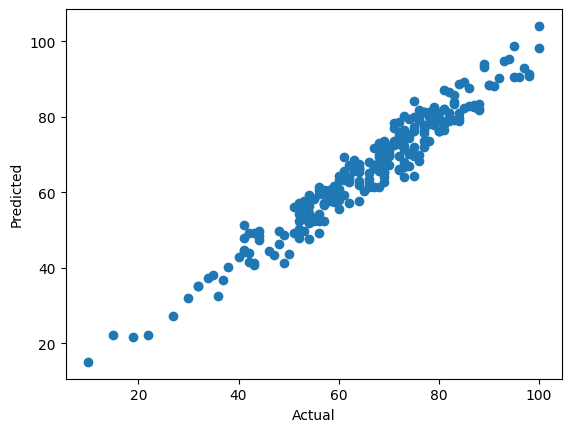

In [29]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

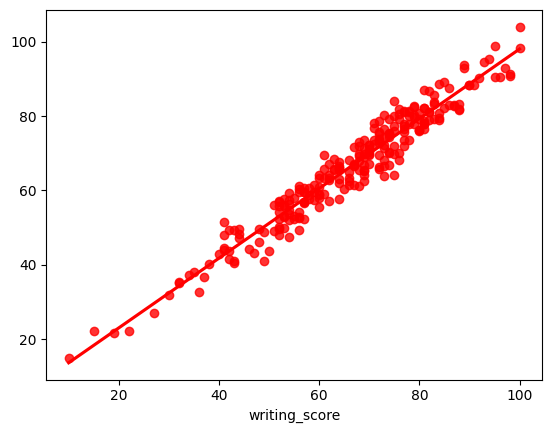

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,84,88.612501,-4.612501
737,73,66.689023,6.310977
740,72,73.611513,-1.611513
660,73,71.397238,1.602762
411,78,79.953414,-1.953414
...,...,...,...
109,72,65.841831,6.158169
430,59,61.543759,-2.543759
77,81,78.118726,2.881274
84,34,37.328609,-3.328609


####  -------------ENDS HERE------------------